# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# One conclusion that can be drawn from this analysis is that the "Capomulin" regimen shows a potential positive effect on reducing tumor volume in mice.
# Another conclusion that can be drawn from this analysis is that the "Infubinol" regimen may have an outlier affecting its data distribution
# A pie chart was generated to visualize the gender distribution among the mice. The dataset consisted of roughly an equal number of female and male mice.
# In summary, the analysis of the data and visualizations provides insights into the relationships between drug regimens, tumor volumes, and other variables. 
#It's evident that different drug regimens have varying effects on tumor volumes.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', lambda x: st.sem(x, nan_policy='omit'))
])

summary_stats_advanced

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

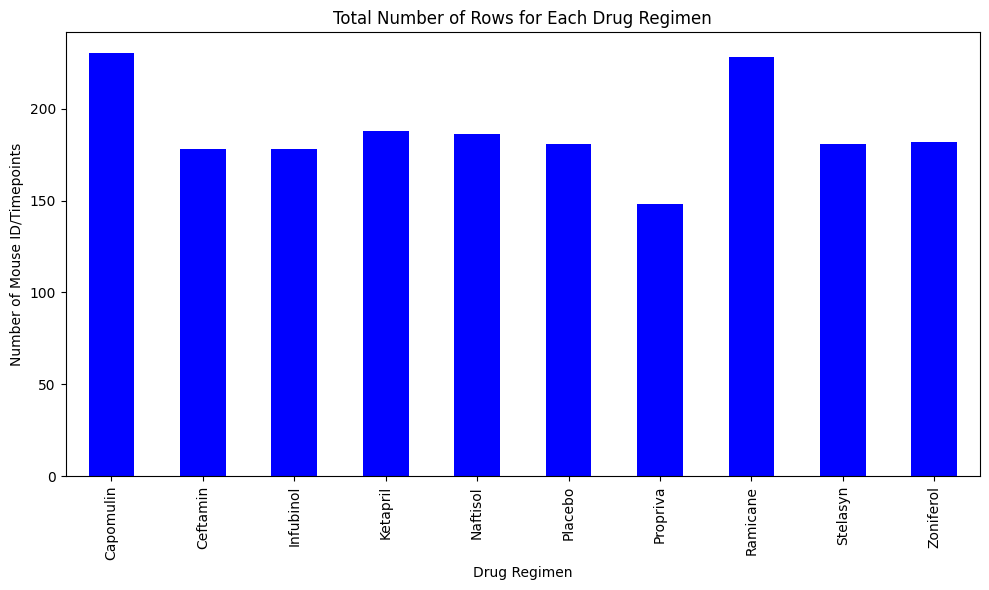

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data.groupby("Drug Regimen").size()

# Create a bar plot 
regimen_counts.plot(kind="bar", figsize=(10, 6), color="blue")

# Labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

plt.tight_layout()
plt.show()

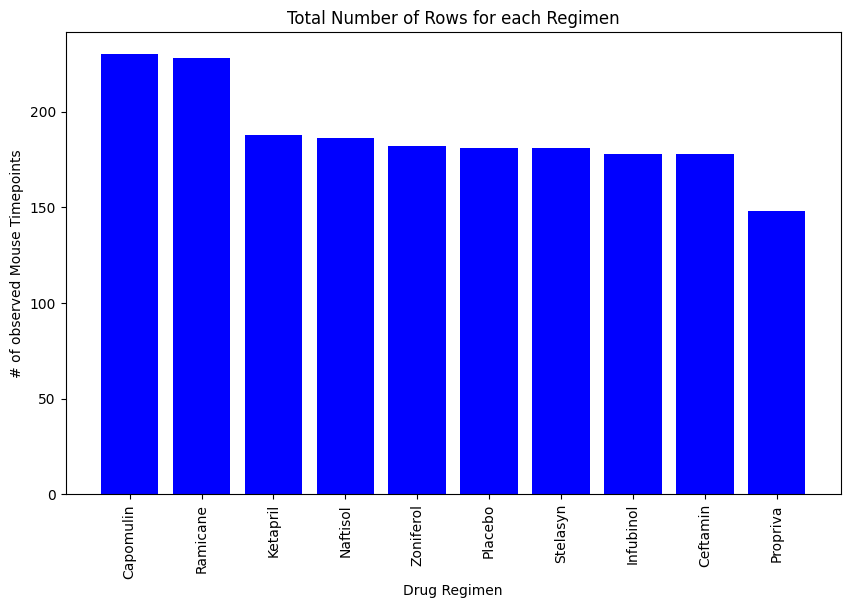

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color="blue")

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Total Number of Rows for each Regimen")
plt.xticks(rotation=90)

plt.tight_layout
plt.show()

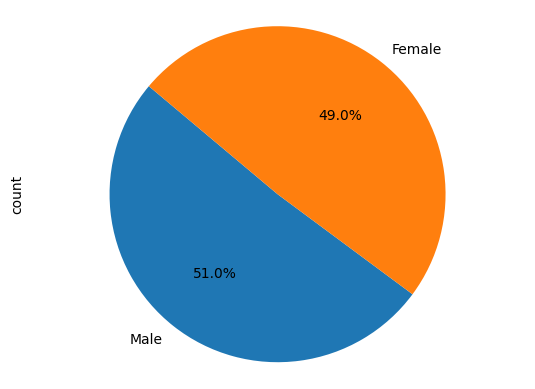

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#counts = clean_data.Sex.value_counts()

# Create a pie plot
#counts.plot(kind="pie", autopct="%1.1%%", colors=["blue", "lightcoral"])

#plt.show()
gender_counts = clean_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140)

plt.axis("equal") 
plt.show()

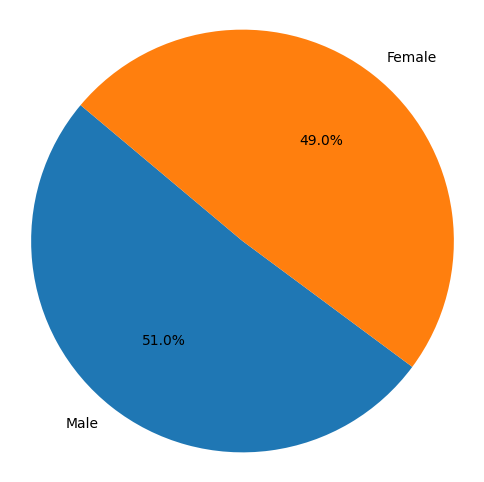

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)

plt.axis("equal") 
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoint_df, clean_data, on=["Mouse ID", "Timepoint"])
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes["Drug Regimen"].isin(treatment_regimens)]

final_tumor_volumes

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Loop through each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on the current drug regimen
    regimen_data = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    tumor_volume_data.append(regimen_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(potential_outliers)
#tumor_volume_data
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


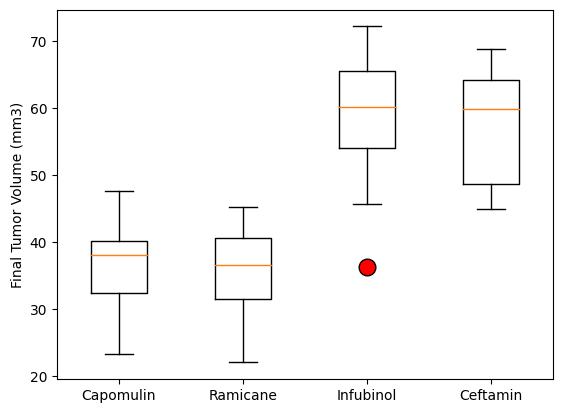

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_volume_data, labels = treatment_regimens,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

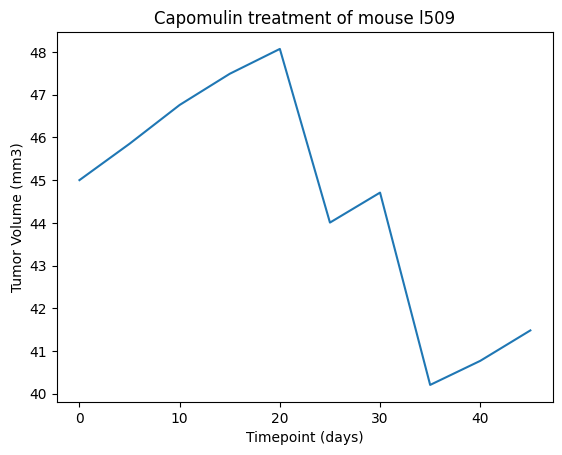

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

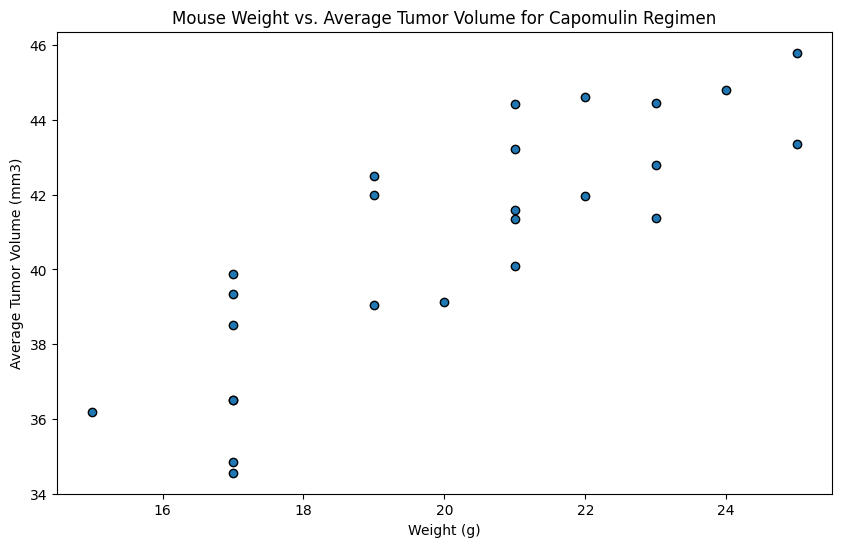

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = combined_data[combined_data['Drug Regimen'] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], marker='o', edgecolors='black')

# Set plot labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()

## Correlation and Regression

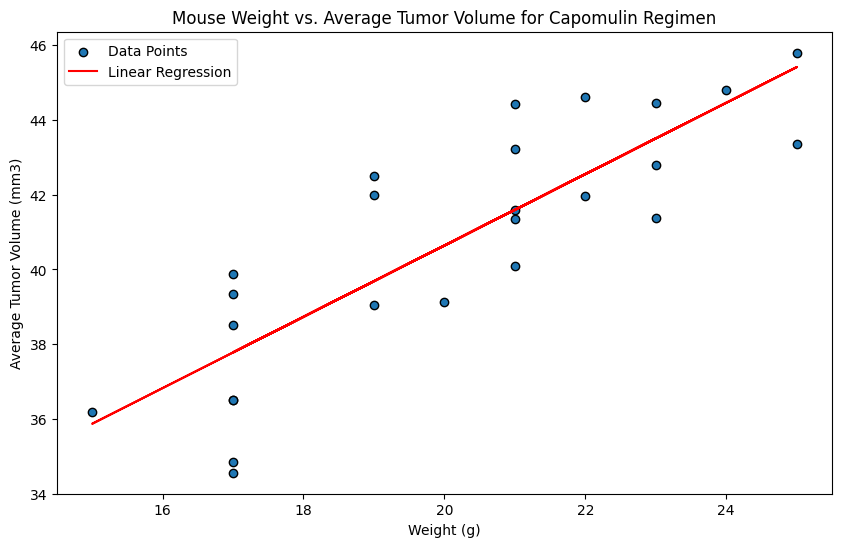

In [95]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_table = combined_data[combined_data['Drug Regimen'] == "Capomulin"]

# Calculate the average observed tumor volume and weight for each mouse
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Extract weight and tumor volume data
weight = capomulin_average['Weight (g)']
tumor_volume = capomulin_average['Tumor Volume (mm3)']

# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(weight, tumor_volume)[0, 1]

# Perform linear regression using numpy's polyfit function
coefficients = np.polyfit(weight, tumor_volume, 1)  # Linear regression
slope = coefficients[0]
intercept = coefficients[1]

# Calculate R-squared value
predicted_tumor_volume = slope * weight + intercept
residuals = tumor_volume - predicted_tumor_volume
r_squared = 1 - (np.sum(residuals**2) / np.sum((tumor_volume - np.mean(tumor_volume))**2))

# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(weight, tumor_volume, marker='o', edgecolors='black', label='Data Points')
plt.plot(weight, intercept + slope * weight, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()

# Display the plot
plt.show()